In [1]:
# Initial imports.
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
ff_cancer_df = pd.read_csv('../../cleaned_data/us_clean/SW21 - ML_data_ff_cancer_w_avgs.csv', dtype={'GEOID': str})
ff_cancer_df.head()

,latitude,longitude,GEOID,County_x,nameplate_capacity_MW1,NOx_tons1,SO2_tons1,CO2_tons1,CH4_lbs1,N2O_lbs1,...,avg_CO2_over_d2,avg_CH4_over_d2,avg_N2O_over_d2,avg_PM2.5_over_d2,avg_NOx_norm_over_d2,avg_SO2_norm_over_d2,avg_CO2_norm_over_d2,avg_CH4_norm_over_d2,avg_N2O_norm_over_d2,avg_PM2.5_norm_over_d2
0,32.534920,-86.642749,01001,Autauga County,939.4,50.521,3.849,762545.203,28447.358,2844.736,...,9090.126982,405.357721,57.630938,0.404770,0.005512,0.008032,7.723091,1.124036,0.292679,0.000477
1,30.660970,-87.749840,01003,Baldwin County,50.0,450.864,4.580,167490.328,6318.013,631.801,...,555.172427,19.553800,1.955380,0.043945,0.005227,0.000431,3.475500,0.126674,0.012667,0.000382
2,31.869603,-85.393197,01005,Barbour County,120.5,312.818,0.590,0.000,134642.958,24655.800,...,5.282991,35.935270,6.714078,0.001799,0.001069,0.000666,0.060757,0.308435,0.057802,0.000031
3,32.998644,-87.126439,01007,Bibb County,13.0,16.113,2.219,0.011,12526.086,1644.049,...,1157.221806,111.274622,15.659547,0.051646,0.000896,0.000105,0.894578,0.282251,0.044297,0.000042
4,33.980867,-86.567371,01009,Blount County,3.8,2.197,0.009,1006.565,37.975,3.790,...,3172.217969,659.893056,95.881832,0.032135,0.000698,0.000065,1.383653,0.245878,0.035385,0.000033


In [3]:
print(ff_cancer_df.columns.tolist())

['latitude', 'longitude', 'GEOID', 'County_x', 'nameplate_capacity_MW1', 'NOx_tons1', 'SO2_tons1', 'CO2_tons1', 'CH4_lbs1', 'N2O_lbs1', 'PM2.5_tons1', 'dist_from_county1', 'nameplate_capacity_MW2', 'NOx_tons2', 'SO2_tons2', 'CO2_tons2', 'CH4_lbs2', 'N2O_lbs2', 'PM2.5_tons2', 'dist_from_county2', 'nameplate_capacity_MW3', 'NOx_tons3', 'SO2_tons3', 'CO2_tons3', 'CH4_lbs3', 'N2O_lbs3', 'PM2.5_tons3', 'dist_from_county3', 'nameplate_capacity_MW4', 'NOx_tons4', 'SO2_tons4', 'CO2_tons4', 'CH4_lbs4', 'N2O_lbs4', 'PM2.5_tons4', 'dist_from_county4', 'nameplate_capacity_MW5', 'NOx_tons5', 'SO2_tons5', 'CO2_tons5', 'CH4_lbs5', 'N2O_lbs5', 'PM2.5_tons5', 'dist_from_county5', 'fuel_type1_Biomass', 'fuel_type1_Coal', 'fuel_type1_Gas', 'fuel_type1_Oil', 'fuel_type1_Other Fossil', 'fuel_type2_Biomass', 'fuel_type2_Coal', 'fuel_type2_Gas', 'fuel_type2_Oil', 'fuel_type2_Other Fossil', 'fuel_type3_Biomass', 'fuel_type3_Coal', 'fuel_type3_Gas', 'fuel_type3_Oil', 'fuel_type3_Other Fossil', 'fuel_type4_Biom

In [4]:
# Define the features set.
X = ff_cancer_df.copy()
X = X.drop(['GEOID', 'County_x', 'County_y', 'cardio_death',
        'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney_and_renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hodgkins_lymphoma', 'oral_cavity', 'ovary', 'pancreas', 'prostate',
       'pediatric_asthma', 'adult_asthma', 'COPD', 'adult_chronic_lung_disease',
       'stomach', 'thyroid', 'uterus','adult_chronic_lung_disease', 'pediatric_asthma_per_100k',
       'adult_asthma_per_100k', 'COPD_per_100k',
       'adult_chronic_lung_disease_per_100k', 'cardio_death_per_100k'], axis=1)
X.head()

,latitude,longitude,nameplate_capacity_MW1,NOx_tons1,SO2_tons1,CO2_tons1,CH4_lbs1,N2O_lbs1,PM2.5_tons1,dist_from_county1,...,avg_CO2_over_d2,avg_CH4_over_d2,avg_N2O_over_d2,avg_PM2.5_over_d2,avg_NOx_norm_over_d2,avg_SO2_norm_over_d2,avg_CO2_norm_over_d2,avg_CH4_norm_over_d2,avg_N2O_norm_over_d2,avg_PM2.5_norm_over_d2
0,32.534920,-86.642749,939.4,50.521,3.849,762545.203,28447.358,2844.736,36.930022,10.0,...,9090.126982,405.357721,57.630938,0.404770,0.005512,0.008032,7.723091,1.124036,0.292679,0.000477
1,30.660970,-87.749840,50.0,450.864,4.580,167490.328,6318.013,631.801,7.857154,19.0,...,555.172427,19.553800,1.955380,0.043945,0.005227,0.000431,3.475500,0.126674,0.012667,0.000382
2,31.869603,-85.393197,120.5,312.818,0.590,0.000,134642.958,24655.800,1.386006,30.0,...,5.282991,35.935270,6.714078,0.001799,0.001069,0.000666,0.060757,0.308435,0.057802,0.000031
3,32.998644,-87.126439,13.0,16.113,2.219,0.011,12526.086,1644.049,0.000000,31.0,...,1157.221806,111.274622,15.659547,0.051646,0.000896,0.000105,0.894578,0.282251,0.044297,0.000042
4,33.980867,-86.567371,3.8,2.197,0.009,1006.565,37.975,3.790,0.154237,30.0,...,3172.217969,659.893056,95.881832,0.032135,0.000698,0.000065,1.383653,0.245878,0.035385,0.000033


In [5]:
X.to_csv("feat.csv")

In [24]:
# Define the target set.
tar_list = ['cardio_death', 'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney_and_renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hodgkins_lymphoma', 'oral_cavity', 'ovary', 'pancreas', 'prostate',
       'stomach', 'thyroid', 'uterus', 'pediatric_asthma',
       'adult_asthma', 'COPD', 'adult_chronic_lung_disease', 'pediatric_asthma_per_100k',
       'adult_asthma_per_100k', 'COPD_per_100k',
       'adult_chronic_lung_disease_per_100k', 'Total Population','cardio_death_per_100k']
y = ff_cancer_df[tar_list]
y

,cardio_death,total_cancer,bladder,brain,breast,breast_insitu,cervix,colon,esophagus,kidney_and_renal,...,pediatric_asthma,adult_asthma,COPD,adult_chronic_lung_disease,pediatric_asthma_per_100k,adult_asthma_per_100k,COPD_per_100k,adult_chronic_lung_disease_per_100k,Total Population,cardio_death_per_100k
0,263.9,506.4,15.8,7.0,124.4,23.9,0.0,45.8,0.0,10.6,...,1718.0,3906.0,4274.0,8657.0,3059.934099,6956.986375,7612.432095,15419.004364,56145.0,470.032950
1,241.9,455.7,23.1,6.5,124.7,25.5,11.0,33.3,0.0,11.6,...,6393.0,16246.0,19461.0,36546.0,2788.208664,7085.443135,8487.615957,15938.976043,229287.0,105.500966
2,351.2,447.2,13.3,0.0,109.5,22.6,0.0,41.9,0.0,0.0,...,664.0,1760.0,2001.0,3855.0,2700.394485,7157.672130,8137.785188,15677.742080,24589.0,1428.280939
3,323.6,466.1,19.8,0.0,113.9,0.0,0.0,26.4,0.0,0.0,...,584.0,1603.0,1754.0,3433.0,2638.236357,7241.597398,7923.744127,15508.673654,22136.0,1461.872064
4,283.6,438.7,17.4,6.7,113.6,21.6,0.0,34.4,0.0,11.2,...,1742.0,4028.0,4638.0,9075.0,3009.727189,6959.346222,8013.269061,15679.261908,57879.0,489.987733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,204.1,427.8,23.0,8.2,86.4,14.9,0.0,25.7,0.0,15.1,...,932.0,3218.0,1824.0,5399.0,2184.050805,7541.068123,4274.365524,12652.028215,42673.0,478.288379
2585,118.9,410.8,18.7,0.0,155.2,32.7,0.0,37.9,0.0,0.0,...,357.0,1945.0,1149.0,3094.0,1519.342895,8277.652466,4889.985956,13167.638422,23497.0,506.022045
2586,221.3,353.7,20.6,0.0,112.2,0.0,0.0,43.3,0.0,0.0,...,482.0,1460.0,902.0,2565.0,2384.368044,7222.359634,4462.033144,12688.597576,20215.0,1094.731635
2587,207.3,351.0,0.0,0.0,101.7,0.0,0.0,0.0,0.0,0.0,...,147.0,591.0,433.0,1043.0,1894.329897,7615.979381,5579.896907,13440.721649,7760.0,2671.391753


In [25]:
# Splitting into Train and Test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Creating a StandardScaler instance.
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Model

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

RF = {}
eval_RF = {}
for i in y_train.columns:
    RF[i] = RandomForestRegressor(n_estimators=1024, random_state = 78)
    RF[i].fit(X_train_scaled,y_train[i])
    pred = RF[i].predict(X_test_scaled)
    pred_train = RF[i].predict(X_train_scaled)
    eval_RF[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_RF

{'cardio_death': [0.9418551129951124, 0.6134171941662971],
 'total_cancer': [0.9551678430549312, 0.7553605860242674],
 'bladder': [0.9487132925963299, 0.531349877830886],
 'brain': [0.9551241974810936, 0.5970920802812341],
 'breast': [0.9430715251270325, 0.6812180296059729],
 'breast_insitu': [0.9488522408246479, 0.628873598175693],
 'cervix': [0.9366997611286323, 0.6126368003748974],
 'colon': [0.9329973047353874, 0.49155450637534626],
 'esophagus': [0.9415493810221938, 0.5279765710934372],
 'kidney_and_renal': [0.9461964736468513, 0.5663196145323439],
 'leukemia': [0.9432225243131915, 0.5755250178969299],
 'liver': [0.9482816558533781, 0.6268307724151161],
 'lung': [0.9470348425159906, 0.6773752218851954],
 'melanoma': [0.9389408006681784, 0.5152191102797314],
 'non-hodgkins_lymphoma': [0.9485196699147787, 0.619829429063679],
 'oral_cavity': [0.9479232952477059, 0.5593850516943794],
 'ovary': [0.9486095123626576, 0.6549364097981649],
 'pancreas': [0.9533812503100952, 0.57855084994456

In [12]:
RF_test = {}
eval_RF_test = {}
#test with a different set
for i in [1,900]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    X_scaler = scaler.fit(X_train)
# Scaling the data.
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    RF_test[str(i)] = RandomForestRegressor(n_estimators=1024, random_state = i)
    RF_test[str(i)].fit(X_train_scaled,y_train["uterus"])
    pred = RF_test[str(i)].predict(X_test_scaled)
    pred_train = RF_test[str(i)].predict(X_train_scaled)
    eval_RF_test[i] = [r2_score(y_train["uterus"],pred_train),r2_score(y_test["uterus"], pred)]
eval_RF_test


{1: [0.9487929134716441, 0.6426584848278549],
 900: [0.9492159205351487, 0.662062801817255]}

In [13]:
df = pd.DataFrame.from_dict(eval_RF,orient='columns')
df["R2"] = ["R2 train","R2 test"]
df2 = df[df.columns.to_list()[-1:] + df.columns.to_list()[:-1]]
df2.to_csv("R2_RF_ff.csv",index=False)

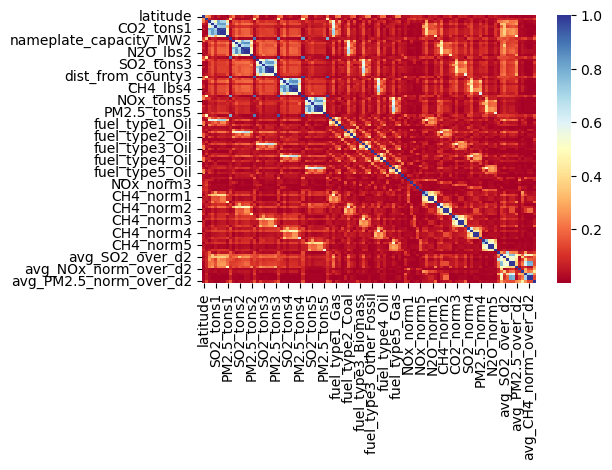

In [21]:
corr_df = X.corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_df.abs(),cmap="RdYlBu")
my_dpi = 200
#plt.figure(figsize=(400/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.tight_layout()
plt.savefig("X_corr.png",dpi=my_dpi)

In [28]:
X.corr().to_csv("feature_corr.csv")

In [18]:
#Which features are correlated?
high_corr={}
feat_list = X.columns.to_list()
for i in range(len(feat_list)-1):
    high_corr[feat_list[i]] = []
    for j in range(i+1, len(feat_list)):
        if (abs(X[feat_list[i]].corr(X[feat_list[j]])) >= 0.95):
            high_corr[feat_list[i]].append(feat_list[j])

exl = []
for x in high_corr.keys():
    if (len(high_corr[x]) != 0):
        exl.append(x)

In [19]:
X_mod = X[[x for x in feat_list if x not in exl]]
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, random_state=78)
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y = ml_df[tar_list]

In [28]:
import xgboost
from sklearn.metrics import mean_squared_error, r2_score
rf_xg= {}
eval_xg = {}
for i in y_train.columns:
    rf_xg[i] = xgboost.XGBRFRegressor()
    rf_xg[i].fit(X_train_scaled,y_train[i])
    pred = rf_xg[i].predict(X_test_scaled)
    pred_train = rf_xg[i].predict(X_train_scaled)
    eval_xg[i] = [r2_score(y_train[i],pred_train),r2_score(y_test[i], pred)]
eval_xg

{'cardio_death': [0.7033633904143346, 0.5638440078939984],
 'total_cancer': [0.8278741875375831, 0.7307234143951704],
 'bladder': [0.81414406960688, 0.5250755820876469],
 'brain': [0.890062813531093, 0.597087495650718],
 'breast': [0.8100816856559636, 0.6887244510692487],
 'breast_insitu': [0.8122461658869051, 0.6305564367318461],
 'cervix': [0.839420929700918, 0.6013479413455161],
 'colon': [0.7637295162503532, 0.4851861220468856],
 'esophagus': [0.9404751599364325, 0.5502643147463693],
 'kidney_and_renal': [0.8167492441545525, 0.5598112496481445],
 'leukemia': [0.8220632585732908, 0.5634977414118554],
 'liver': [0.9061097064718584, 0.6208358484797591],
 'lung': [0.7728361604334947, 0.6637778616427272],
 'melanoma': [0.7805776960256783, 0.5070634243767002],
 'non-hodgkins_lymphoma': [0.8463157975167469, 0.6276654377114548],
 'oral_cavity': [0.8686027370057944, 0.5802184916000337],
 'ovary': [0.8453475862055881, 0.6638146790049853],
 'pancreas': [0.8719792175718744, 0.5741293268764056]

In [29]:
feat_imp = {}
for i in y_train.columns:
    feat_imp[i] = rf_xg[i].feature_importances_
feat_imp_df = pd.DataFrame.from_dict(feat_imp,orient='columns')
feat_imp_df["features"]=X_test.columns.to_list()
feat_imp_df.head()

,cardio_death,total_cancer,bladder,brain,breast,breast_insitu,cervix,colon,esophagus,kidney_and_renal,...,adult_asthma,COPD,adult_chronic_lung_disease,pediatric_asthma_per_100k,adult_asthma_per_100k,COPD_per_100k,adult_chronic_lung_disease_per_100k,Total Population,cardio_death_per_100k,features
0,0.069463,0.024269,0.012346,0.004970,0.014400,0.005182,0.010584,0.017908,0.004165,0.008638,...,0.020228,0.009227,0.013026,0.125853,0.082727,0.055217,0.062003,0.011057,0.004692,latitude
1,0.047108,0.094300,0.029374,0.008397,0.035577,0.029326,0.004427,0.027100,0.013470,0.004943,...,0.036833,0.012846,0.028254,0.159757,0.232102,0.097845,0.212184,0.033563,0.015646,longitude
2,0.006500,0.005007,0.005704,0.003780,0.004430,0.005832,0.006404,0.006756,0.010141,0.005597,...,0.020619,0.012508,0.017388,0.002354,0.001758,0.003061,0.001841,0.015686,0.008481,nameplate_capacity_MW1
3,0.004084,0.004374,0.004958,0.006454,0.004317,0.004949,0.005799,0.005229,0.005126,0.011347,...,0.006370,0.018215,0.016326,0.007082,0.003821,0.002604,0.003835,0.016161,0.005877,NOx_tons1
4,0.005394,0.005294,0.008926,0.005626,0.005601,0.006188,0.005180,0.005629,0.005185,0.006025,...,0.031203,0.024605,0.047677,0.005647,0.003297,0.005304,0.003615,0.053210,0.021511,SO2_tons1


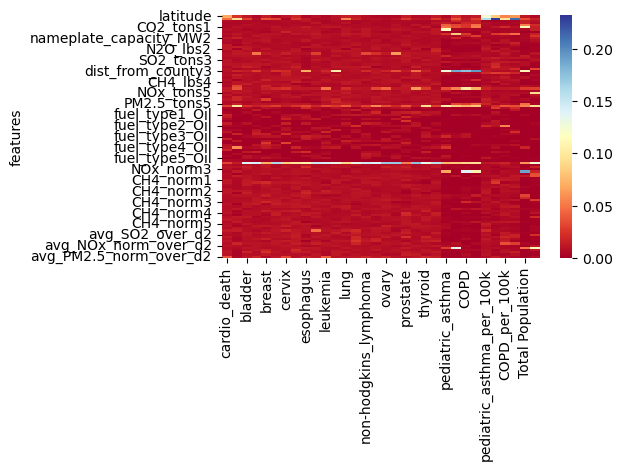

In [30]:
feat_imp_df.set_index("features",inplace=True)
%matplotlib inline
import seaborn as sns
sns.heatmap(feat_imp_df,cmap="RdYlBu")
my_dpi = 200
#plt.figure(figsize=(400/my_dpi, 400/my_dpi), dpi=my_dpi)
plt.tight_layout()
plt.savefig("feat_importance.png",dpi=my_dpi)

In [34]:
feat_imp_df.to_csv("feat_imp_xgboost.csv")

In [8]:
# Create a random forest regressor.
rf_model = RandomForestRegressor(n_estimators = 1024, random_state = 78)

In [9]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [10]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [11]:
print(rf_model.score(X_train_scaled, y_train))
print(rf_model.score(X_test_scaled, y_test))

0.950391802731808
0.6636867780516436


### Lasso Model

In [12]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.02)
lasso = lasso.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data.
predictions = lasso.predict(X_test_scaled)

In [14]:
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.28247675143780826
0.18828243053977023
